In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np

from numpy.fft import fft, fftfreq, fftshift

import matplotlib.pyplot as plt

# 2 - Importação das base 

In [3]:
path_0 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589749293-1589749360.csv'
path_1 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589745611-1589745678.csv'
path_2 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589741926-1589741992.csv'
path_3 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589738236-1589738304.csv'
path_4 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589734547-1589734613.csv'
path_5 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589730864-1589730930.csv'
path_6 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589727180-1589727247.csv'
path_7 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589723497-1589723562.csv'
path_8 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589719814-1589719881.csv'
path_9 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589716130-1589716198.csv'
path_10 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589712447-1589712513.csv'
path_11 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589708764-1589708830.csv'
path_12 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589705079-1589705146.csv'
path_13 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589701392-1589701458.csv'
path_14 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589697708-1589697775.csv'
path_15 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589694024-1589694091.csv'
path_16 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589690330-1589690396.csv'
path_17 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589686645-1589686713.csv'
path_18 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589682974-1589683028.csv'
path_19 = '/content/drive/MyDrive/Colab Notebooks/Desafio Tractian/Coletas-Geladeira/1589679298-1589679343.csv'

In [4]:
base_0 = pd.read_csv(path_0, names=['x', 'y', 'z', 'temperatura'])
base_1 = pd.read_csv(path_1, names=['x', 'y', 'z', 'temperatura'])
base_2 = pd.read_csv(path_2, names=['x', 'y', 'z', 'temperatura'])
base_3 = pd.read_csv(path_3, names=['x', 'y', 'z', 'temperatura'])
base_4 = pd.read_csv(path_4, names=['x', 'y', 'z', 'temperatura'])
base_5 = pd.read_csv(path_5, names=['x', 'y', 'z', 'temperatura'])
base_6 = pd.read_csv(path_6, names=['x', 'y', 'z', 'temperatura'])
base_7 = pd.read_csv(path_7, names=['x', 'y', 'z', 'temperatura'])
base_8 = pd.read_csv(path_8, names=['x', 'y', 'z', 'temperatura'])
base_9 = pd.read_csv(path_9, names=['x', 'y', 'z', 'temperatura'])
base_10 = pd.read_csv(path_10, names=['x', 'y', 'z', 'temperatura'])
base_11 = pd.read_csv(path_11, names=['x', 'y', 'z', 'temperatura'])
base_12 = pd.read_csv(path_12, names=['x', 'y', 'z', 'temperatura'])
base_13 = pd.read_csv(path_13, names=['x', 'y', 'z', 'temperatura'])
base_14 = pd.read_csv(path_14, names=['x', 'y', 'z', 'temperatura'])
base_15 = pd.read_csv(path_15, names=['x', 'y', 'z', 'temperatura'])
base_16 = pd.read_csv(path_16, names=['x', 'y', 'z', 'temperatura'])
base_17 = pd.read_csv(path_17, names=['x', 'y', 'z', 'temperatura'])
base_18 = pd.read_csv(path_18, names=['x', 'y', 'z', 'temperatura'])
base_19 = pd.read_csv(path_19, names=['x', 'y', 'z', 'temperatura'])

In [5]:
# Fazendo a união de todas as bases
df = pd.concat([base_0, base_1,
                base_2,
                base_3,
                base_4,
                base_5,
                base_6,
                base_7,
                base_8,
                base_9,
                base_10,
                base_11,
                base_12,
                base_13,
                base_14,
                base_15,
                base_16,
                base_17,
                base_18,
                base_19])

df.head()

,x,y,z,temperatura
0,-9.58,-0.92,-2.36,47.31
1,-9.67,-1.35,-1.72,47.40
2,-9.42,-0.38,-0.88,47.31
3,-9.08,1.30,0.26,47.35
4,-9.02,1.30,-0.38,47.35


# 3 - Dicionário de dados

1.  x -> aceleração no eixo x, em m/sˆ2
2.  y -> aceleração no eixo y, em m/sˆ2
3.  z -> aceleração no eixo z, em m/sˆ2
4.  temperatura -> temperatura do mecanismo 

# 4 - Detalhes e Análises

In [6]:
# Quantidade de registros na base analisada 
df.shape

(255125, 4)

In [7]:
# Apagando a coluna temperatura como foi pedido na descrição do desafio
df.drop('temperatura', axis=1, inplace=True)
df.head()

,x,y,z
0,-9.58,-0.92,-2.36
1,-9.67,-1.35,-1.72
2,-9.42,-0.38,-0.88
3,-9.08,1.30,0.26
4,-9.02,1.30,-0.38


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,255125.0,-9.284836,0.285014,-11.77,-9.32,-9.28,-9.24,-6.74
y,255125.0,0.005739,0.674169,-1.98,-0.03,0.01,0.05,1.98
z,255125.0,-1.137486,0.789193,-4.99,-1.19,-1.12,-1.06,3.57


Algumas informações:
 
1. As coordenadas X e Y tem uma variação bem pequena em relação a Z
2. Os valores próximos do segundo quartil (50%) podem nos dizer quando o motor está desligado ou em funcionamento.


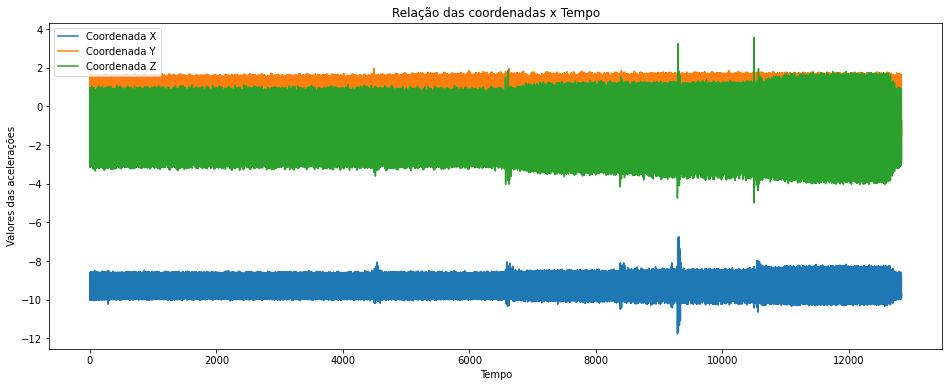

In [9]:
plt.figure(figsize=(16, 6))
plt.plot(df['x'], label = 'Coordenada X')
plt.plot(df['y'], label = 'Coordenada Y')
plt.plot(df['z'], label = 'Coordenada Z')
plt.title('Relação das coordenadas x Tempo')
plt.xlabel('Tempo')
plt.ylabel('Valores das acelerações')
plt.legend()
plt.show()

**Informações do gráfico:**
 
1. Podemos notar que os valores das acelerações não estão próximas, como no  
exemplo da das coordenadas Z e Y que estão bem próximas. O que se pode afirmar que o motor da geladeira nao esta em uma superfície plana, o que pode causar problemas no funcionamento do motor;
 
2. Podemos notar que na coordenada Z, os valores estão tendo uma variação expressiva em relação às outras coordenadas, isso pode ocorrer pois o motor está desbalanceado.
 
3. Outra informação dada pelo gráfico são os picos de recorrentes no decorrer das amostras. Esses picos podem ser devido ao funcionamento do motor no instante em que foi recolhido as amostras, onde podemos analisar que as coordenadas X e Z tem mudanças de valores expressivas, enquanto a coordenada Y quase não sofre alteração. 


## Transformações dos dados para a frequência.
 

In [10]:
tam = np.arange(0, len(df['x']))

In [11]:
X = fft(df['x'])/len(tam)
Y = fft(df['y'])/len(tam)
Z = fft(df['y'])/len(tam)

In [12]:
w = fftfreq(len(tam))

In [13]:
wd = fftshift(w)
Xd = fftshift(X)
Yd = fftshift(Y)
Zd = fftshift(Z)

In [14]:
mod_X = np.abs(Xd)
mod_Y = np.abs(Yd)
mod_Z = np.abs(Zd)

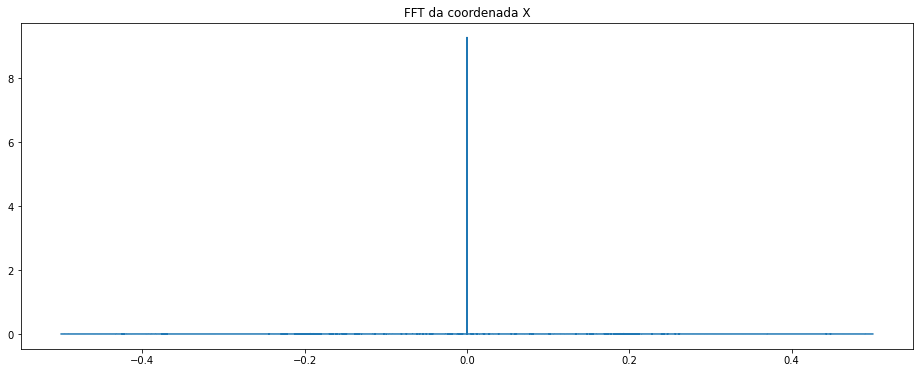

In [15]:
plt.figure(figsize=(16, 6))
plt.plot(wd, mod_X)
plt.title('FFT da coordenada X')
plt.show()

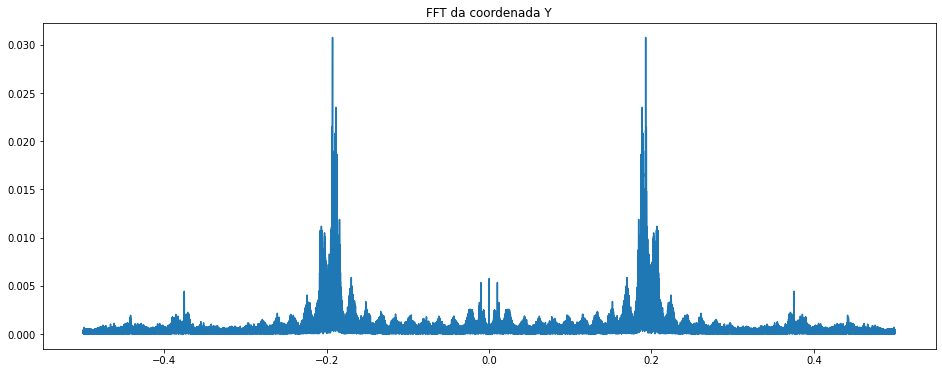

In [16]:
plt.figure(figsize=(16, 6))
plt.plot(wd, mod_Y)
plt.title('FFT da coordenada Y')
plt.show()

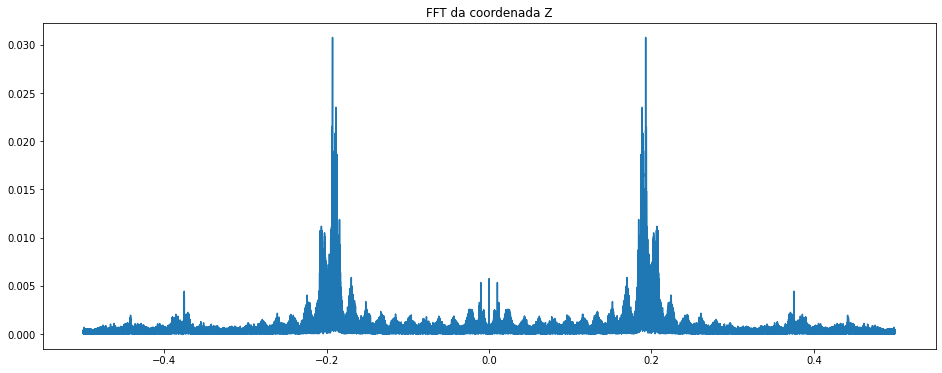

In [17]:
plt.figure(figsize=(16, 6))
plt.plot(wd, mod_Z)
plt.title('FFT da coordenada Z')
plt.show()

Conclusões dos gráficos da fft:
 
- O comportamento das coordenadas na frequência junto dos harmônicos apresentados somente nas coordenadas Y e Z.


